# Introduction to Linear Regression


||**supervised**|**unsupervised**|
|---|---|---|
|**continuous data**|**regression**|dimentionality reduction|
|**categorical data**|classification|clustering|


## Lifecycle In A Data Science Projects
1. Data Analysis / Data Pre-Processing / Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Evaluation
6. Model Deployment
7. Model Monitoring

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

I have downloaded the dataset from Kaggle - [Advertising Data](https://www.kaggle.com/datasets/ashydv/advertising-dataset)

In [2]:
# read data into a DataFrame
chd=os.chdir(r"C:\Mrityunjaya\Learning\ML\Linear Regression")
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


What are the **features**?
- TV: Advertisement cost (in 1000 dollar) on TV for a single product in a given market. (in thousands of dollars)
- Radio: Advertisement cost (in 1000 dollar) on Radio of that product.
- Newspaper: Advertisement cost (in 1000 dollar) by Newspaper for that product.

What is the **response**?
- Sales: Sales (in million dollar) of that product in a given market.

## Exploratory Data Analysis

In [3]:
# print the shape of the DataFrame
print("Shape of data:",data.shape)

Shape of data: (200, 4)


There are 200 **observations**, since we have data of advertisement for a single product in different markets. Hence 200 markets in the dataset for that product.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         199 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
var=[features for features in data.columns if features!='Sales']
adv=[]
for x in var:
    adv.append(data[x].sum())
    
print("Percentage of cost spent in advertisement in 200 markets:",np.round(sum(adv)/(data['Sales'].sum()*1000)*100,2),"%")

Percentage of cost spent in advertisement in 200 markets: 1.33 %


In [6]:
# Calculating the percentage of cost spend on advertisement for each market
var=[features for features in data.columns if features!='Sales']
for i in range(0,200,1):
    adv=[]
    for x in var:
        adv.append(data.iloc[i,:][x].sum())
    
    print("Percentage of cost spent in advertisement in {} markets:{}%".format(i,np.round(sum(adv)/(data.iloc[i,:]['Sales']*1000)*100,2)))

Percentage of cost spent in advertisement in 0 markets:1.53%
Percentage of cost spent in advertisement in 1 markets:1.24%
Percentage of cost spent in advertisement in 2 markets:1.1%
Percentage of cost spent in advertisement in 3 markets:1.52%
Percentage of cost spent in advertisement in 4 markets:1.4%
Percentage of cost spent in advertisement in 5 markets:1.84%
Percentage of cost spent in advertisement in 6 markets:0.96%
Percentage of cost spent in advertisement in 7 markets:1.15%
Percentage of cost spent in advertisement in 8 markets:0.24%
Percentage of cost spent in advertisement in 9 markets:1.43%
Percentage of cost spent in advertisement in 10 markets:0.76%
Percentage of cost spent in advertisement in 11 markets:1.39%
Percentage of cost spent in advertisement in 12 markets:1.36%
Percentage of cost spent in advertisement in 13 markets:0.82%
Percentage of cost spent in advertisement in 14 markets:1.49%
Percentage of cost spent in advertisement in 15 markets:1.32%
Percentage of cost s

In [7]:
# checking for missing values
NA = [features for features in data.columns if data[features].isnull().sum()>0]
for features in NA:
    print(features,":",np.round(data[features].isnull().mean()*100,2),"% missing values")

TV : 0.5 % missing values
Radio : 1.5 % missing values


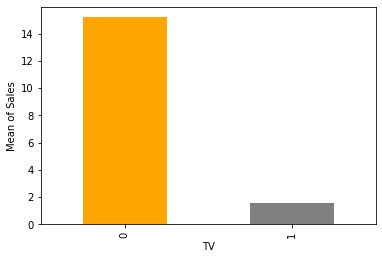

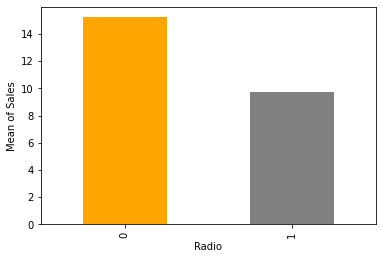

In [8]:
# checking for dependence of missing values on dependent variable
for features in NA:
    dcopy=data.copy()
    dcopy[features]=np.where(dcopy[features].isnull(),1,0)
    dcopy.groupby(features)['Sales'].mean().plot.bar(color=['orange','grey'])
    plt.ylabel('Mean of Sales')
    plt.show()

- From the above graph, we can conclude that missing values are more significant in advertising through Radio as compared to TV.
- We can drop the missing records as the percentage is quit low (i.e <2%), but we will impute the missing values in feature engineering section.

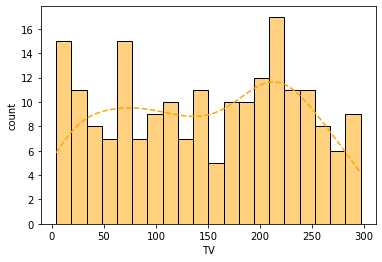

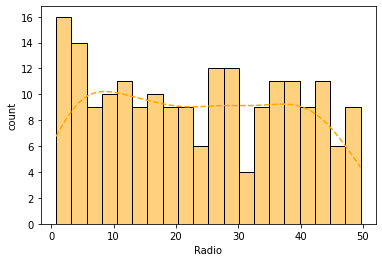

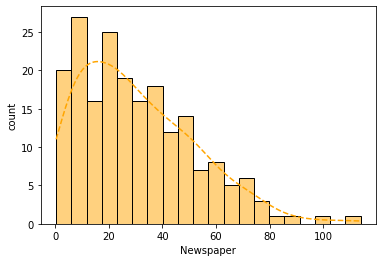

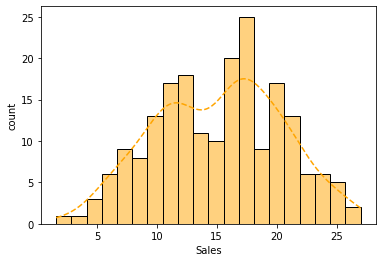

In [9]:
# checking for data distribution using histogram
for features in data.columns:
    sns.histplot(data[features],bins=20,kde=True,color='orange',line_kws={'linestyle':'dashed'})
    plt.xlabel(features)
    plt.ylabel("count")
    plt.show()

- From above graph, it is clear that the data is not normally distributed.
- Some outlier value are present in Newspaper adv.
- Please note that Linear Regression model is based on assumption that the data should be normally distributed.

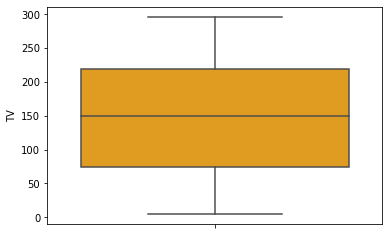

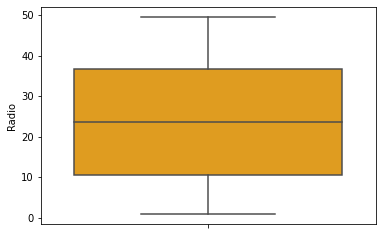

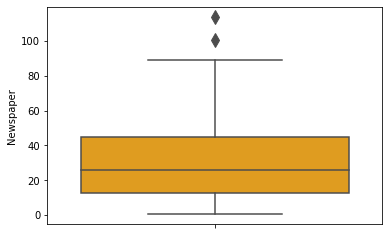

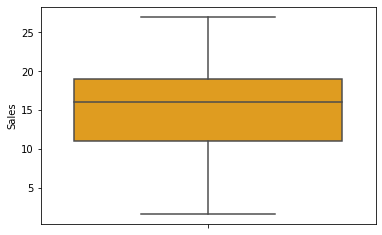

In [10]:
# checking outliers uaing box plot
for features in data.columns:
    sns.boxplot(y=data[features],hue=True,color='orange',fliersize=10)
    plt.ylabel(features)
    plt.show()

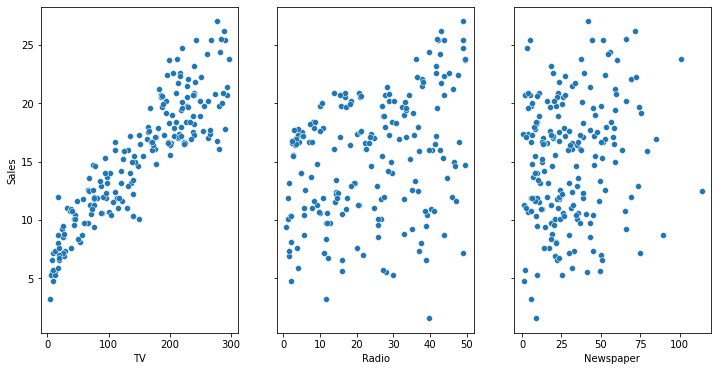

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(12,6))
feature= [features for features in data.columns if features !='Sales']
for i,j in enumerate(feature,0):
    sns.scatterplot(x=data[j],y=data['Sales'],ax=axs[i])


In [12]:
# checking for correlation between features
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.042058,0.048489,0.900726
Radio,0.042058,1.000000,0.349290,0.335200
Newspaper,0.048489,0.349290,1.000000,0.157960
Sales,0.900726,0.335200,0.157960,1.000000


<AxesSubplot:>

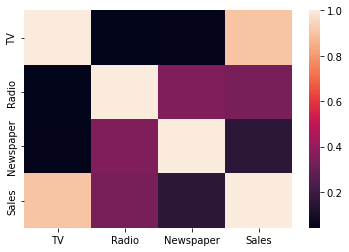

In [13]:
sns.heatmap(data.corr())

A valuable numerical measure of association between two variables is the correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables.

### Questions About the Advertising Data

Suppose, we work for the company that manufactures and markets this product. The company might ask the following questions: On the basis of this data, how should we spend our advertising money in the future?

This general question might leads to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

**Let's Find ...**

## Feature Engineering

### Imputing the missing values
- For imputing missing values in continuous numerical variable, generally we use the mean or median of the data.
- When the data is normally distributed, the central tendancy of the data is represented by mean. Hence, impute the missing values with mean.
- When the data is skewed, the central tendancy of the data is represented by median. Hence, impute the missing values with median.

In [14]:
# In this case, I'm imputting the missing value with random value between 0 & 1.
NA = [features for features in data.columns if data[features].isnull().sum()>0]
for features in NA:
    data[features].fillna(np.round(np.random.rand(),1),inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Normalizing the independent variable
- Please note that, we will only normalize the independent varibale. Hence, it is require to split the dataset into dependent and independent variables.
- We will split the independent variable into training and testing set before normalization to avoid data leakage.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Seperating the dependent and independent variable
X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
# Normalizing X_train
normalize=MinMaxScaler()
normalize.fit(X_train)
x_train=normalize.transform(X_train)

In [20]:
# Normalizing X_test
normalize=MinMaxScaler()
normalize.fit(X_test)
x_test=normalize.transform(X_test)

### Model Development

#### Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**.

$Sales = \beta_0 + \beta_1TV$

- Coefficients are estimated using the **least squares criterion**, by minimizes the **sum of squared residuals** (or "sum of squared errors"):

We can also use **ScikitLearn** to estimate the model coefficients for the advertising data:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
X = data['TV'].values.reshape(-1,1)
Y = data['Sales'].values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X,Y)
print('Intercept:', regr.intercept_)
print('Coefficient:', regr.coef_)

Intercept: [6.97465749]
Coefficient: [[0.05546532]]


Thus, predicting the sales value for the product.

In [23]:
regr.predict(np.array([[50]]))

array([[9.74792349]])

In [24]:
regr.predict(pd.DataFrame([50]))

array([[9.74792349]])

#### Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [25]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,1.0
1,296.4


In [26]:
# make predictions for those x values and store them
preds = regr.predict(X_new)
preds

C:\Users\chmr2001\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 7.03012281],
       [23.41457833]])

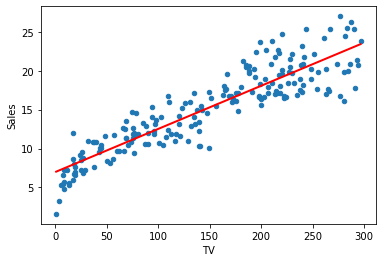

In [27]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new['TV'],preds, color='red',linewidth=2)
plt.show()

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

What do we mean by the variance and bias of a statistical learning
method?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

In [28]:
import statsmodels.formula.api as sm
lm=sm.ols(formula='Sales~TV',data=data).fit()

In [29]:
lm.params

Intercept    6.974657
TV           0.055465
dtype: float64

In [30]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.338502,7.610813
TV,0.051727,0.059204


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that we just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [31]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    5.126725e-54
TV           8.064934e-74
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

Let's calculate the R-squared value for our simple linear model:

In [32]:
# print the R-squared value for the model
lm.rsquared

0.8121432271938711

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

**Mean Square Error MSE**
The mean squared error tells, how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. ... It's called the mean squared error as we're finding the average of a set of errors

**In Least Squares Method, we are trying to minimize MSE**

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = regr.predict(X)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y, Y_pred))
print('Coefficient of determination: %.2f'% r2_score(Y, Y_pred))

Mean squared error: 5.22
Coefficient of determination: 0.81


## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [34]:
# create a fitted model with all three features
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    4.626189
TV           0.054443
Radio        0.106963
Newspaper    0.000348
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of ~54 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [35]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           8.55e-99
Time:                        13:42:11   Log-Likelihood:                -383.39
No. Observations:                 200   AIC:                             774.8
Df Residuals:                     196   BIC:                             788.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6262      0.308     15.042      0.000       4.020       5.233
TV             0.0544      0.001     39.578      0.000       0.052       0.057
Radio          0.1070      0.008     12.599      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.060      0.952      -0.011       0.012
==============================================================================
Omnibus:                       16.239   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.061
Skew:                          -0.434   Prob(JB):                     8.07e-07
Kurtosis:                       4.617   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.90) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [36]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.902539862921313

In [37]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.90254166331925

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting). Adjusted R-squared increases only when a significant predictor is added to the model.


## Linear Regression in scikit-learn

Let's do some of the Statsmodels code using normalized data in scikit-learn:

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

5.0019571059390415
[15.68969054  5.52021739 -0.35075758]


In [39]:
# calculate the R-squared
lm.score(x_train,y_train)

0.9132301107304046

Observed that their is little increase in R-squared value with normalized data.

In [40]:
lm.predict(x_test)

array([10.93705337,  8.89675125,  9.7898445 , 25.25984075, 14.95182018,
        8.53820211, 10.65420777, 18.77637057,  9.95769236, 18.24124964,
       23.75040581, 10.91767984, 13.71344526, 17.47681974, 12.01023094,
       13.62859376, 21.61015092,  9.39893585, 14.38741854, 19.24887344,
       25.16054477, 12.74706562, 16.8755176 , 14.04825283,  8.00277667,
       15.46330854, 15.00246181, 21.06774   , 17.3314513 ,  9.0455254 ,
       12.36848877, 21.09307726, 21.63452935, 22.25613158,  7.28204771,
        7.23628269,  9.38706365, 15.79223307, 13.52753404,  7.43605823])

In [41]:
from numpy import array
array(y_test)

array([11.3,  8.4, 12. , 25.4, 16.7,  8.7,  7.2, 18.2,  9.2, 16.6, 24.2,
       10.6, 15.5, 20.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       16.1, 12.9,  8.1, 15.2, 17.6, 22.6, 16.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 17.9, 13.6,  7.2])

In [42]:
from sklearn.metrics import mean_squared_error as mse
print("Test MSE:",mse(y_test,lm.predict(x_test)))

Test MSE: 4.636087364025291


In [43]:
print("Training MSE:",mse(y_train,lm.predict(x_train)))

Training MSE: 2.2670341514931907


Testing error is greater than training error. Hence we can say that the model has high variance. To get more accurate model we need to perform hyper-parametertuning.

### Hyper-parameter tuning using Lasso

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

In [45]:
alpha= np.logspace(-4,4,9)
param={'alpha':alpha}
search=GridSearchCV(lasso,param,cv=5)
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])})

In [46]:
print("Best alpha:",search.best_params_['alpha'])
print("Best Score:",search.best_score_)

Best alpha: 0.01
Best Score: 0.9036004555138953


In [47]:
final_model=Lasso(alpha=search.best_params_['alpha'])
final_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [48]:
# R-squred
final_model.score(x_test,y_test)

0.8619892403420144

In [49]:
from sklearn.metrics import mean_squared_error as mse
print("Test MSE:",mse(y_test,final_model.predict(x_test)))
print("Training MSE:",mse(y_train,final_model.predict(x_train)))

Test MSE: 4.606536936940207
Training MSE: 2.2734339423301595


Great ! We have observed slight improvement in the model after parameter tuning.